#step1: import related dependencies(libraries)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


# step1:loading the data using pandas

In [2]:
df=pd.read_excel("pima-data (1).xlsx")
df

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,diabetes_orig,skin,has_diabetes,diabetes
0,6,148,72,35,0,33.6,0.627,50,1,1.3790,True,True
1,1,85,66,29,0,26.6,0.351,31,0,1.1426,False,False
2,8,183,64,0,0,23.3,0.672,32,1,0.0000,True,True
3,1,89,66,23,94,28.1,0.167,21,0,0.9062,False,False
4,0,137,40,35,168,43.1,2.288,33,1,1.3790,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0,1.8912,False,False
764,2,122,70,27,0,36.8,0.340,27,0,1.0638,False,False
765,5,121,72,23,112,26.2,0.245,30,0,0.9062,False,False
766,1,126,60,0,0,30.1,0.349,47,1,0.0000,True,True


# step2:cleanign the data

In [3]:
df.isnull().sum()
# has_diabetes

num_preg         0
glucose_conc     0
diastolic_bp     0
thickness        0
insulin          0
bmi              0
diab_pred        0
age              0
diabetes_orig    0
skin             0
has_diabetes     0
diabetes         0
dtype: int64

## if null values are use dropna or fillna
## if you have more data then use dropna otherwise fillna

## finding the corelation between two cloums

corr=df.corr()
corr

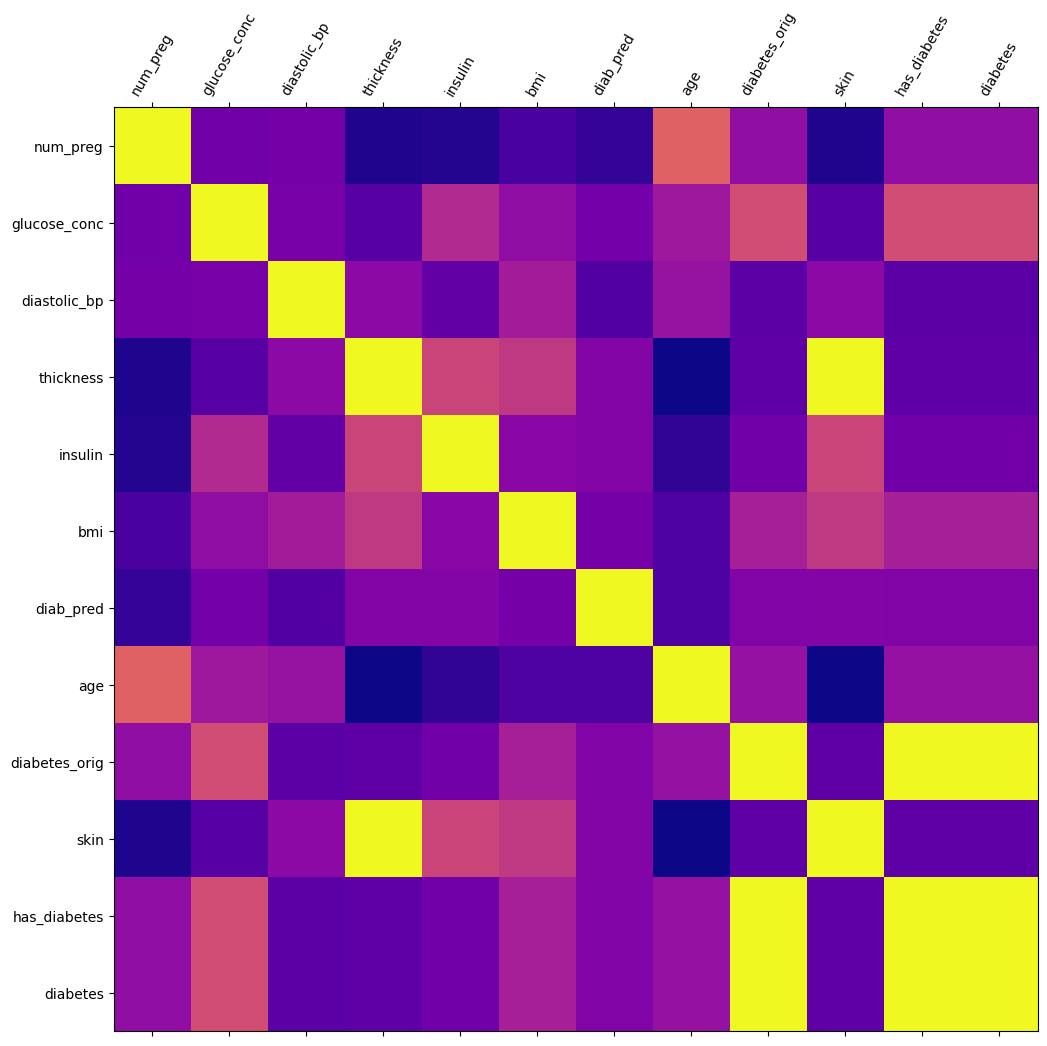

In [4]:
corr=df.corr()
fig,ax=plt.subplots(figsize=(12,12))
cmap='plasma'
ax.matshow(corr,cmap=cmap)
plt.xticks(range(len(corr.columns)),corr.columns,rotation=60)
plt.yticks(range(len(corr.columns)),corr.columns)
plt.show()

# step:3 drop the corelated colums

In [5]:
df.drop('thickness',axis=1,inplace=True)
df.drop('has_diabetes',axis=1,inplace=True)
df.drop('diabetes_orig',axis=1,inplace=True)

In [6]:
df.head()

,num_preg,glucose_conc,diastolic_bp,insulin,bmi,diab_pred,age,skin,diabetes
0,6,148,72,0,33.6,0.627,50,1.3790,True
1,1,85,66,0,26.6,0.351,31,1.1426,False
2,8,183,64,0,23.3,0.672,32,0.0000,True
3,1,89,66,94,28.1,0.167,21,0.9062,False
4,0,137,40,168,43.1,2.288,33,1.3790,True


# repacing the string data

In [7]:
# creating a dictionary to convert True to 1 and False to 0
# want to replace true anf false in diabetes columns
dict1={
    'diabetes':[True,False]
}
# Inplace of true place 1 and false place 0
dict2={
    'diabetes':[1,0]
}
df.replace(dict1,dict2,)

C:\Users\Rajeswari\AppData\Local\Temp\ipykernel_13992\3308502726.py:10: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace(dict1,dict2,)


,num_preg,glucose_conc,diastolic_bp,insulin,bmi,diab_pred,age,skin,diabetes
0,6,148,72,0,33.6,0.627,50,1.3790,1
1,1,85,66,0,26.6,0.351,31,1.1426,0
2,8,183,64,0,23.3,0.672,32,0.0000,1
3,1,89,66,94,28.1,0.167,21,0.9062,0
4,0,137,40,168,43.1,2.288,33,1.3790,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,180,32.9,0.171,63,1.8912,0
764,2,122,70,0,36.8,0.340,27,1.0638,0
765,5,121,72,112,26.2,0.245,30,0.9062,0
766,1,126,60,0,30.1,0.349,47,0.0000,1


In [8]:
df.head()

,num_preg,glucose_conc,diastolic_bp,insulin,bmi,diab_pred,age,skin,diabetes
0,6,148,72,0,33.6,0.627,50,1.3790,True
1,1,85,66,0,26.6,0.351,31,1.1426,False
2,8,183,64,0,23.3,0.672,32,0.0000,True
3,1,89,66,94,28.1,0.167,21,0.9062,False
4,0,137,40,168,43.1,2.288,33,1.3790,True


# cheking the result

In [9]:
num_true = len(df.loc[df['diabetes']==True])
num_false= len(df.loc[df['diabetes']==False])
print(f'num_true={num_true}')
print(f'num_flase={num_false}')
print('true=',(num_true/(num_true+num_false))*100)
print('false=',(num_false/(num_true+num_false))*100)

num_true=268
num_flase=500
true= 34.89583333333333
false= 65.10416666666666


In [10]:
num_true = len(df.loc[df['diabetes']==1])
num_false= len(df.loc[df['diabetes']==0])
print(f'num_true={num_true}')
print(f'num_flase={num_false}')
print('true=',(num_true/(num_true+num_false))*100)
print('false=',(num_false/(num_true+num_false))*100)

num_true=268
num_flase=500
true= 34.89583333333333
false= 65.10416666666666


# trian test split

In [11]:
from sklearn.model_selection import train_test_split
df.columns

Index(['num_preg', 'glucose_conc', 'diastolic_bp', 'insulin', 'bmi',
       'diab_pred', 'age', 'skin', 'diabetes'],
      dtype='object')

In [12]:
from sklearn.model_selection import train_test_split
input_columns=['num_preg', 'glucose_conc', 'diastolic_bp',
                   'skin','insulin','bmi','diab_pred','age']
       
output_columns=['diabetes']
x=df[input_columns].values
y=df[output_columns].values
split_test_size=0.30
x_train,x_test,y_train,y_test=train_test_split(x,y,
                                               test_size=split_test_size,random_state=42)

In [13]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(537, 8)
(537, 1)
(231, 8)
(231, 1)


In [14]:
# make sure training data and testing data in 70% and 30%
print('{0:0.2f}% in traing set'.format((len(x_train)/len(df.index))*100))
print('{0:0.2f}% in testinf set'.format((len(x_test)/len(df.index))*100))

69.92% in traing set
30.08% in testinf set


In [15]:
print('training true:{0} ({1:0.2f}%)'.format(len(y_train[y_train[ : ] == 1]),len(y_train[y_train[ : ] ==
1])/len(y_train) * 100))
print('training False:{0} ({1:0.2f}%)'.format(len(y_train[y_train[ : ] == 0]),len(y_train[y_train[ : ] ==
0])/len(y_train) * 100))
print('Test true:{0} ({1:0.2f}%)'.format(len(y_test[y_test[ : ] == 1]),len(y_test[y_test[ : ] ==
1])/len(y_train) * 100))
print('Test false:{0} ({1:0.2f}%)'.format(len(y_test[y_test[ : ] == 0]),len(y_test[y_test[ : ] ==
0])/len(y_train) * 100))


training true:188 (35.01%)
training False:349 (64.99%)
Test true:80 (14.90%)
Test false:151 (28.12%)


In [16]:
total_num_preg = len(df.loc[df['num_preg']== 0])
print(f'number of Rows missing in num_preg column is {total_num_preg}')

total_glucose_conc = len(df.loc[df['glucose_conc']==0])
print(f'number of Rows missing in glucose_conc column is {total_glucose_conc}')
total_diastolic_bp = len(df.loc[df['diastolic_bp']==0])
print(f'number of Rows missing in diastolic_bp column is {total_diastolic_bp}')
total_insulin = len(df.loc[df['insulin']==0])
print(f'number of Rows missing in insulin column is {total_insulin}')
total_bmi = len(df.loc[df['bmi']==0])
print(f'number of Rows missing in bmi column is {total_bmi}')
total_diab_pred = len(df.loc[df['diab_pred']==0])
print(f'number of Rows missing in diab_pred column is {total_diab_pred}')
total_age = len(df.loc[df['age'] ==0])
print(f'number of rows missing in age is {total_age}')

number of Rows missing in num_preg column is 111
number of Rows missing in glucose_conc column is 5
number of Rows missing in diastolic_bp column is 35
number of Rows missing in insulin column is 374
number of Rows missing in bmi column is 11
number of Rows missing in diab_pred column is 0
number of rows missing in age is 0


## Imputing

In [17]:
from sklearn.impute import SimpleImputer
fill_zeros = SimpleImputer(missing_values=0,strategy='mean')
x_train = fill_zeros.fit_transform(x_train)
x_test = fill_zeros.fit_transform(x_test)
x_train[0:5]


array([[1.00000000e+00, 9.50000000e+01, 6.00000000e+01, 7.09200000e-01,
        5.80000000e+01, 2.39000000e+01, 2.60000000e-01, 2.20000000e+01],
       [5.00000000e+00, 1.05000000e+02, 7.20000000e+01, 1.14260000e+00,
        3.25000000e+02, 3.69000000e+01, 1.59000000e-01, 2.80000000e+01],
       [4.34056399e+00, 1.35000000e+02, 6.80000000e+01, 1.65480000e+00,
        2.50000000e+02, 4.23000000e+01, 3.65000000e-01, 2.40000000e+01],
       [4.00000000e+00, 1.31000000e+02, 6.80000000e+01, 8.27400000e-01,
        1.66000000e+02, 3.31000000e+01, 1.60000000e-01, 2.80000000e+01],
       [1.00000000e+00, 1.03000000e+02, 3.00000000e+01, 1.49720000e+00,
        8.30000000e+01, 4.33000000e+01, 1.83000000e-01, 3.30000000e+01]])

# step4: training data

In [18]:
from sklearn.naive_bayes import GaussianNB
nb_model = GaussianNB() #creating object for GaussianNB Class
nb_model.fit(x_train,y_train.ravel()) # Training a model

,priors,None
,var_smoothing,1e-09


#### testing the data with training data

In [19]:
from sklearn import metrics
nb_predict_model = nb_model.predict(x_train) # Testing a model
print(f'Predicted accuracy { metrics.accuracy_score(y_train,nb_predict_model) }') # Accuracy

Predicted accuracy 0.7541899441340782


# step5:Testing the Model

In [20]:
from sklearn import metrics
nb_predict_test = nb_model.predict(x_test)
print(f'Predicted accuracy { metrics.accuracy_score(y_test,nb_predict_test) }')

Predicted accuracy 0.7359307359307359


In [21]:
print(f'{ metrics.confusion_matrix(y_test,nb_predict_test)}')

[[118  33]
 [ 28  52]]


In [22]:
print(f'{ metrics.classification_report(y_test,nb_predict_test)}')


              precision    recall  f1-score   support

       False       0.81      0.78      0.79       151
        True       0.61      0.65      0.63        80

    accuracy                           0.74       231
   macro avg       0.71      0.72      0.71       231
weighted avg       0.74      0.74      0.74       231



In [23]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(random_state=42) # creating object for
rf_model.fit(x_train,y_train.ravel()) # Training a machine

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [24]:
from sklearn import metrics
rf_predict_test = rf_model.predict(x_test) # Testing a model
print(f'Predicted accuracy { metrics.accuracy_score(y_test,rf_predict_test) }')

Predicted accuracy 0.7402597402597403


In [25]:
print(f'{ metrics.confusion_matrix(y_test,rf_predict_test)}')
print(f'{ metrics.classification_report(y_test,rf_predict_test)}')



[[119  32]
 [ 28  52]]
              precision    recall  f1-score   support

       False       0.81      0.79      0.80       151
        True       0.62      0.65      0.63        80

    accuracy                           0.74       231
   macro avg       0.71      0.72      0.72       231
weighted avg       0.74      0.74      0.74       231



In [26]:
from sklearn.linear_model import LogisticRegression
lr_model=LogisticRegression( random_state=42)
lr_model.fit(x_train,y_train.ravel())
lr_predict_test=lr_model.predict(x_test)
print(f'Predicted accuracy { metrics.accuracy_score(y_test,lr_predict_test) }')
print(f'{ metrics.confusion_matrix(y_test,lr_predict_test)}')
print(f'{ metrics.classification_report(y_test,lr_predict_test)}')


Predicted accuracy 0.7359307359307359
[[123  28]
 [ 33  47]]
              precision    recall  f1-score   support

       False       0.79      0.81      0.80       151
        True       0.63      0.59      0.61        80

    accuracy                           0.74       231
   macro avg       0.71      0.70      0.70       231
weighted avg       0.73      0.74      0.73       231



C:\Users\Rajeswari\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:470: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
